# Import Libraries

In [1]:
pip install streamlit pandas matplotlib seaborn plotly scikit-learn

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.9 MB 4.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 4.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.9 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.9 MB 4.7 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 4.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 5.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ----------------------------

In [2]:
pip install dash

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 882.6 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/7.9 MB 882.6 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.9 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/7.9 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/7.9 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/7.9 MB 2.7 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.9 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 3.4 MB/s eta 0:00:01
   -------------------------------------- -

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [6]:
# Load trip data
trip_df = pd.read_parquet("yellow_tripdata_2015-01.parquet")

# Load zone lookup
zone_df = pd.read_csv("taxi_zone_lookup.csv")

print("Trip Data Shape:", trip_df.shape)
print("Zone Data Shape:", zone_df.shape)

Trip Data Shape: (12741035, 19)
Zone Data Shape: (265, 4)


# Merge Pickup Location Info

In [7]:
# Merge pickup zone names
trip_df = trip_df.merge(zone_df, left_on='PULocationID', right_on='LocationID', how='left')

# Drop unused columns if needed
trip_df.drop(columns=['LocationID'], inplace=True)

trip_df[['PULocationID', 'Zone', 'Borough']].head()

,PULocationID,Zone,Borough
0,41,Central Harlem,Manhattan
1,166,Morningside Heights,Manhattan
2,238,Upper West Side North,Manhattan
3,162,Midtown East,Manhattan
4,236,Upper East Side North,Manhattan


# Convert Pickup Datetime and Extract Features

In [8]:
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['pickup_hour'] = trip_df['tpep_pickup_datetime'].dt.hour
trip_df['pickup_day'] = trip_df['tpep_pickup_datetime'].dt.day_name()

# Analyze Most Active Pickup Zones

C:\Users\ICT ADMIN\AppData\Local\Temp\ipykernel_48676\1820779494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=zone_counts.index, x=zone_counts.values, palette='viridis')


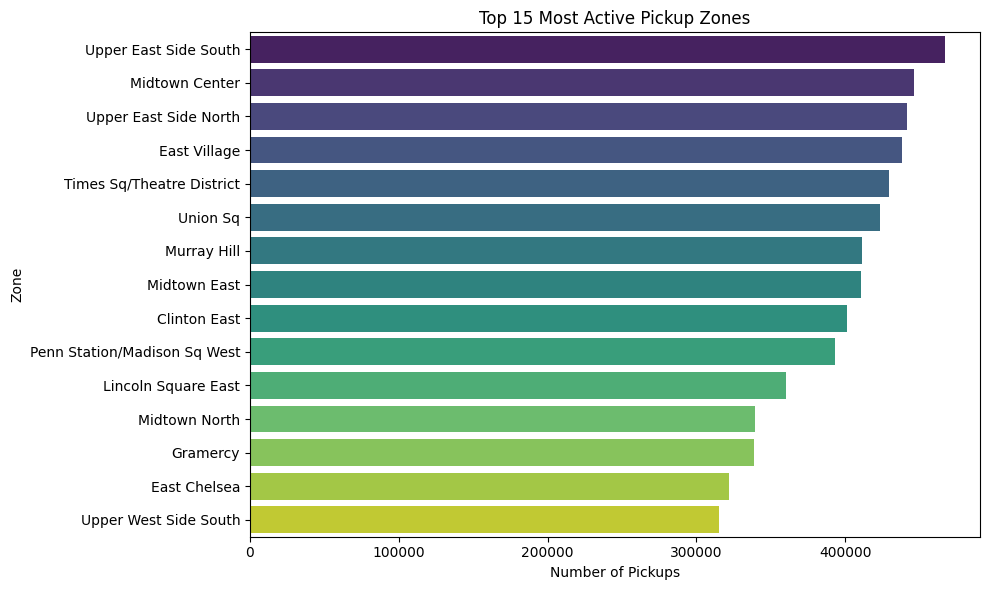

In [9]:
zone_counts = trip_df['Zone'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=zone_counts.index, x=zone_counts.values, palette='viridis')
plt.title("Top 15 Most Active Pickup Zones")
plt.xlabel("Number of Pickups")
plt.ylabel("Zone")
plt.tight_layout()
plt.show()

# Demand by Hour of Day

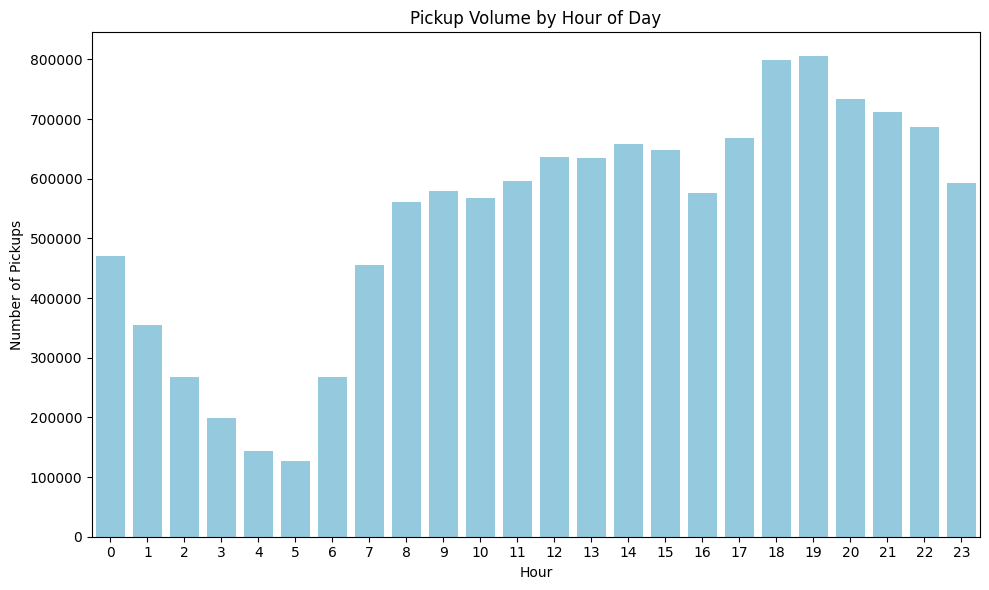

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=trip_df, x='pickup_hour', color='skyblue')
plt.title("Pickup Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()

# Demand by Day of Week

C:\Users\ICT ADMIN\AppData\Local\Temp\ipykernel_48676\2246509652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trip_df, x='pickup_day', order=day_order, palette='coolwarm')


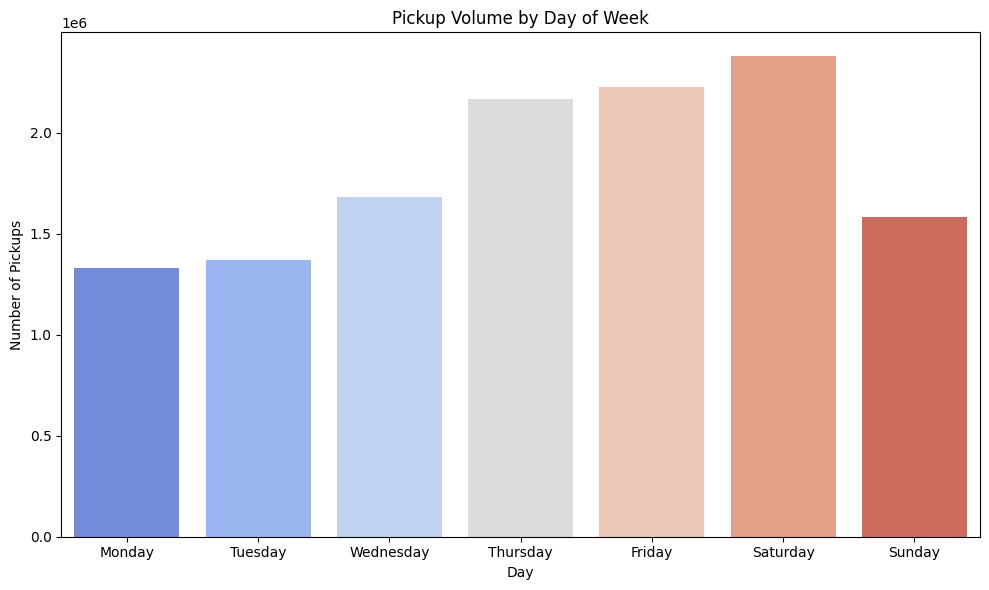

In [11]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=trip_df, x='pickup_day', order=day_order, palette='coolwarm')
plt.title("Pickup Volume by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()

# Pickup trends over time (by date)?

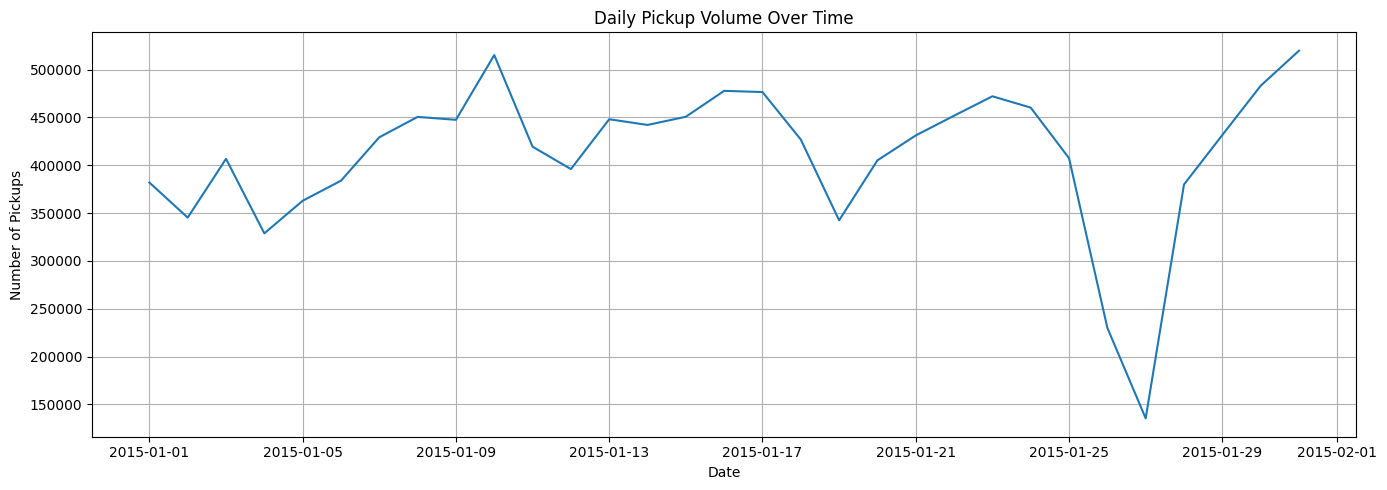

In [12]:
trip_df['pickup_date'] = trip_df['tpep_pickup_datetime'].dt.date
daily_pickups = trip_df.groupby('pickup_date').size()

plt.figure(figsize=(14,5))
daily_pickups.plot()
plt.title("Daily Pickup Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.tight_layout()
plt.show()

# Phase 1: Exploratory Data Analysis (EDA)

Objectives:

* Understand patterns in pickup/dropoff zones

* Uncover relationships between time, location, and tip behavior

## Compare Pickup vs Dropoff Flows

In [13]:
import seaborn as sns

# Create a flow table
flow_counts = trip_df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='trip_count')
flow_counts = flow_counts.sort_values('trip_count', ascending=False).head(10)

# Merge with zone names
zone_df.rename(columns={"LocationID": "PULocationID"}, inplace=True)
flow_counts = flow_counts.merge(zone_df[['PULocationID', 'Zone']], on="PULocationID")
zone_df.rename(columns={"PULocationID": "DOLocationID"}, inplace=True)
flow_counts = flow_counts.merge(zone_df[['DOLocationID', 'Zone']], on="DOLocationID", suffixes=('_PU', '_DO'))

flow_counts[['Zone_PU', 'Zone_DO', 'trip_count']]

,Zone_PU,Zone_DO,trip_count
0,NaN,NaN,212644
1,Upper East Side South,Upper East Side North,59348
2,Upper East Side North,Upper East Side North,53941
3,Upper East Side North,Upper East Side South,51509
4,Upper East Side South,Upper East Side South,46913
5,Upper West Side South,Lincoln Square East,32231
6,Upper West Side South,Upper West Side North,31710
7,East Village,East Village,31057
8,Lincoln Square East,Upper West Side South,29472
9,Upper West Side North,Upper West Side South,28023


## Analyze Tip Amount vs Time or Zone

Text(0.5, 1.0, 'Tip Amount by Pickup Zone')

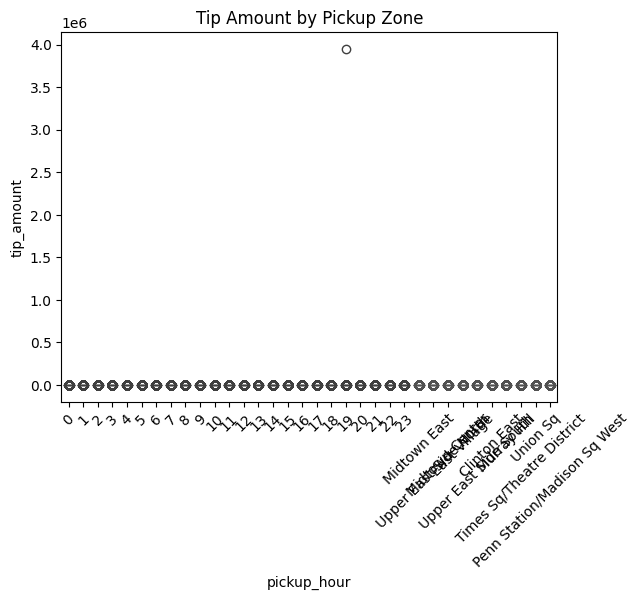

In [14]:
# Tip by hour
sns.boxplot(x='pickup_hour', y='tip_amount', data=trip_df)
plt.title("Tip Amount Distribution by Hour")

# Tip by zone
top_zones = trip_df['Zone'].value_counts().index[:10]
sns.boxplot(x='Zone', y='tip_amount', data=trip_df[trip_df['Zone'].isin(top_zones)])
plt.xticks(rotation=45)
plt.title("Tip Amount by Pickup Zone")

# Phase 2: Clustering High-Congestion Zones

Objective:

Identify zones with persistent high taxi demand (proxy for congestion)

Steps:

1. Aggregate pickup frequency per zone & hour

2. Use KMeans or DBSCAN to cluster

<Axes: xlabel='pickup_hour', ylabel='Zone'>

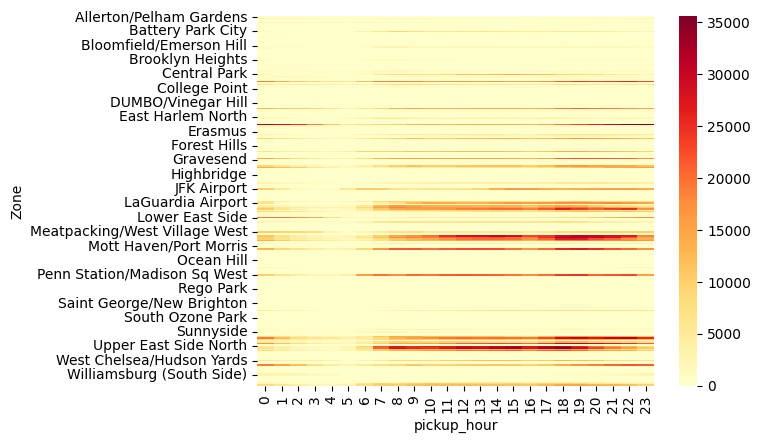

In [15]:
from sklearn.cluster import KMeans

zone_hourly = trip_df.groupby(['Zone', 'pickup_hour']).size().reset_index(name='count')
pivot = zone_hourly.pivot(index='Zone', columns='pickup_hour', values='count').fillna(0)

kmeans = KMeans(n_clusters=4, random_state=0)
pivot['cluster'] = kmeans.fit_predict(pivot)

# Visualize clusters
sns.heatmap(pivot.drop(columns='cluster'), cmap='YlOrRd')

# Phase 3: Predictive Modeling (Demand Forecasting)

Objective:

Predict number of trips for a zone based on time features

Target Variable:

* trip_count (aggregated per zone per hour)

Features:

* Zone, Hour, Day, Borough

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
agg = trip_df.groupby(['Zone', 'pickup_hour', 'pickup_day']).size().reset_index(name='trip_count')
agg = pd.get_dummies(agg, columns=['pickup_day', 'Zone'])

# Model
X = agg.drop(columns='trip_count')
y = agg['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestRegressor().fit(X_train, y_train)
print("Model R^2:", model.score(X_test, y_test))

Model R^2: 0.9546219163113647


In [ ]:
import pickle
# Save aggregated data
agg = trip_df.groupby(['Zone', 'pickup_hour', 'pickup_day']).size().reset_index(name='trip_count')
agg.to_csv('agg_data.csv', index=False)
# Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Phase 4: Dashboard (Streamlit or Plotly Dash)

Deployment Option 1: Streamlit

In [ ]:
streamlit run nyc_taxi_dashboard.py

Deployment Option 2: Plotly Dash